# Import Library 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
!pip install openpyxl

numpy version :  1.21.5
pandas version :  1.4.2
seaborn version :  0.11.2


In [2]:
df = pd.read_excel('Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Exploratory Data Analysis

## Data Filtering

In [5]:
dff=df[df['Country']== 'France'].reset_index(drop = True)
dff

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
8552,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
8553,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
8554,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
8555,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**In this project we'll focus on sales at France only**

## Check Missing Values and Duplicated Values

In [6]:
dff.isna().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID     66
Country         0
dtype: int64

**There's missing value in `CustomerId` column, i've choose not to drop this missing value because this column have not effect on transaction column (`Quantity` and `UnitPrice`)**

In [7]:
dff.duplicated().sum()

16

In [8]:
#Drop Dupilcated Values
dff.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
8552,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
8553,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
8554,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
8555,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Insert New Feautures

In [9]:
dff = dff[(dff.Quantity>0) & (dff.UnitPrice>0)]
dff.shape

(8407, 8)

In [10]:
dff['Invoice_Month'] = dff.InvoiceDate.dt.month

**I insert new column `Invoice_Month`(Separate datetime into month)**

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
dff_new = dff.drop(['Description','InvoiceNo','StockCode','InvoiceDate','CustomerID','Country'],axis=1)


## Check Outliers and Handling Outliers

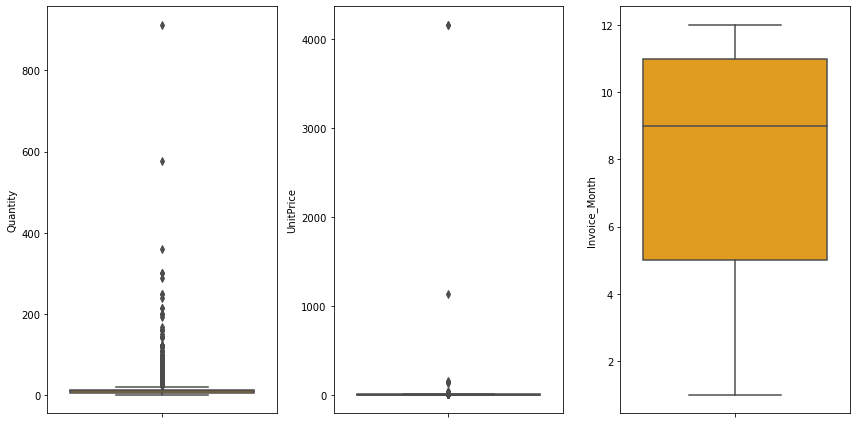

In [12]:
Num = ['Quantity','UnitPrice','Invoice_Month']#'Invoice_Year','Invoice_Month','Invoice_Day','Invoice_WeekDay']
plt.figure(figsize=(12,6))

features = Num
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y =dff_new[features[i]], color='orange')
    plt.tight_layout()

In [13]:
from scipy import stats
z_scores = stats.zscore(dff[['Quantity','UnitPrice']])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
dff_new = dff[filtered_entries]

In [14]:
dff_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8291 entries, 0 to 8556
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      8291 non-null   object        
 1   StockCode      8291 non-null   object        
 2   Description    8291 non-null   object        
 3   Quantity       8291 non-null   int64         
 4   InvoiceDate    8291 non-null   datetime64[ns]
 5   UnitPrice      8291 non-null   float64       
 6   CustomerID     8226 non-null   float64       
 7   Country        8291 non-null   object        
 8   Invoice_Month  8291 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 647.7+ KB


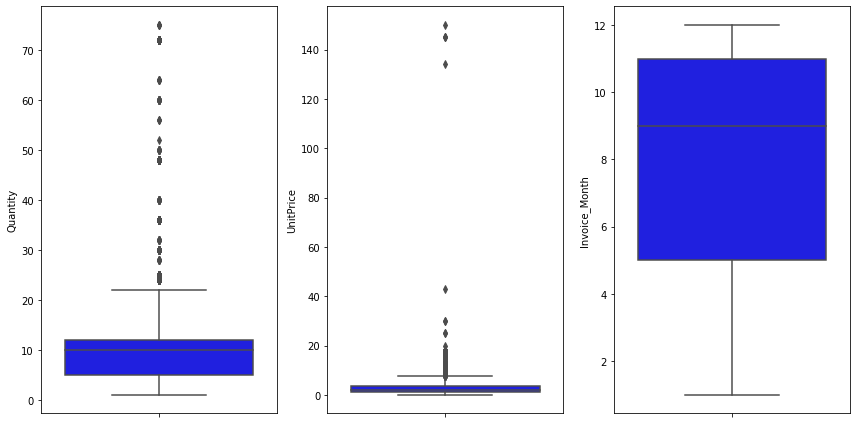

In [15]:
Num = ['Quantity','UnitPrice','Invoice_Month']#'Invoice_Year','Invoice_Month','Invoice_Day','Invoice_WeekDay']
plt.figure(figsize=(12,6))

features = Num
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y =dff_new[features[i]], color='blue')
    plt.tight_layout()

In [16]:
dff_new.shape

(8291, 9)

**Handling Outliers using Z-Score**

## Correlation Matrix

<AxesSubplot:>

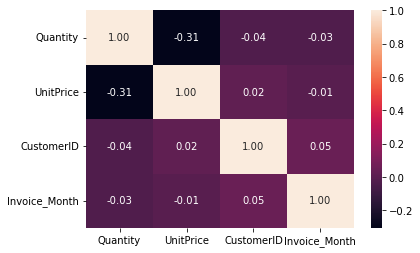

In [17]:
correlation = dff_new.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

## Data Distribution

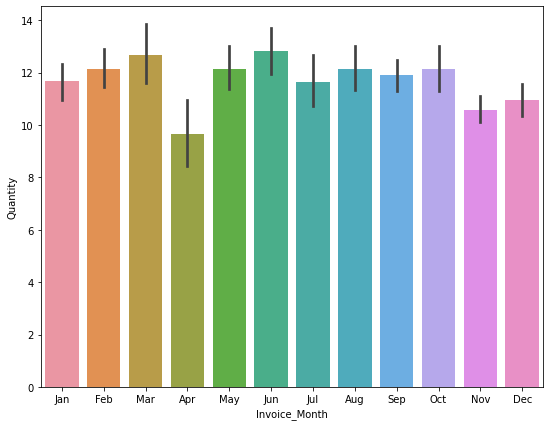

In [18]:
plt.figure(figsize=(9,7))
ax = sns.barplot(data=dff_new,x='Invoice_Month',y='Quantity')
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);

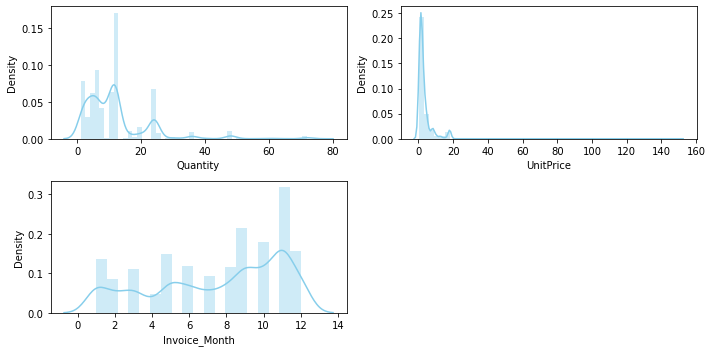

In [19]:
plt.figure(figsize=(10,5))

features = Num
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)

    sns.distplot(x=dff_new[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

# Data Scaling

In [20]:
dff_new = dff_new.drop(['Description','InvoiceNo','StockCode','InvoiceDate','CustomerID','Country'],axis=1)
sc_data = StandardScaler()
data_std = sc_data.fit_transform(dff_new.astype(float))

# Modeling Without PCA

<AxesSubplot:>

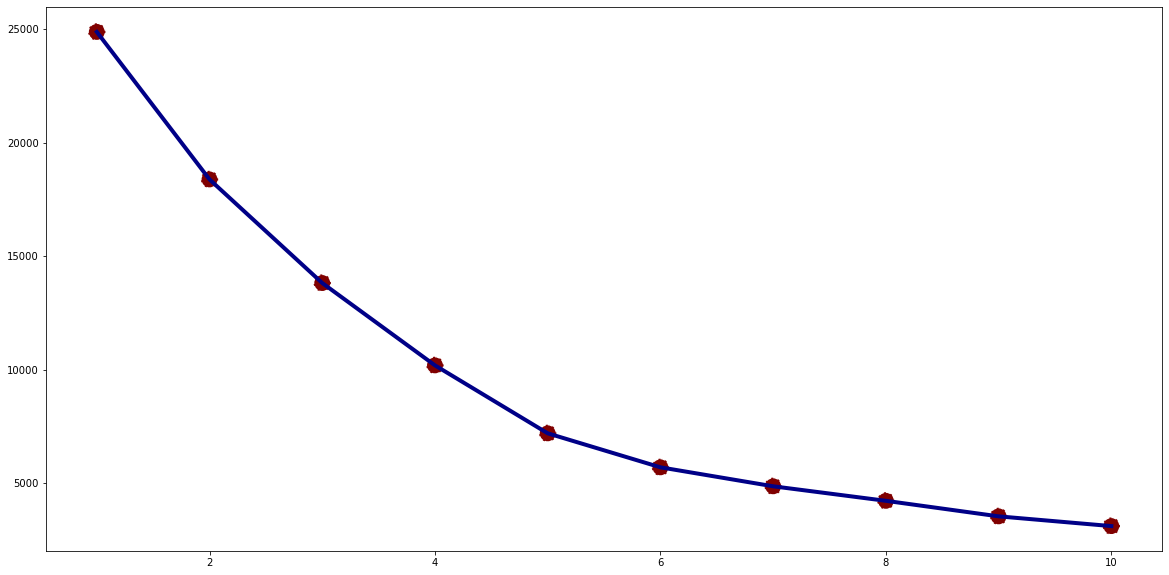

In [21]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(data_std)
    wcss.append(kmeans_pca.inertia_)



plt.figure(figsize=(20, 10))


sns.lineplot(x=range(1, 11), y=wcss, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=wcss, s=300, color='#800000',  linestyle='--')

In [26]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(data_std)

KMeans(n_clusters=4, random_state=42)

In [27]:
df_data_std = pd.DataFrame(data=data_std, columns=list(dff_new))

In [28]:
df_data_std['clusters'] = kmeans.labels_
dff_new['clusters'] = kmeans.labels_
dff_new

,Quantity,UnitPrice,Invoice_Month,clusters
0,24,3.75,12,2
1,24,3.75,12,2
2,12,3.75,12,3
3,12,0.85,12,3
4,24,0.65,12,2
...,...,...,...,...
8552,12,0.85,12,3
8553,6,2.10,12,3
8554,4,4.15,12,3
8555,4,4.15,12,3


In [29]:
dff_new['Segmentation'] = dff_new['clusters'].map({0:'first',
                                            1:'second',
                                            2: 'third',
                                            3: 'fourth'})

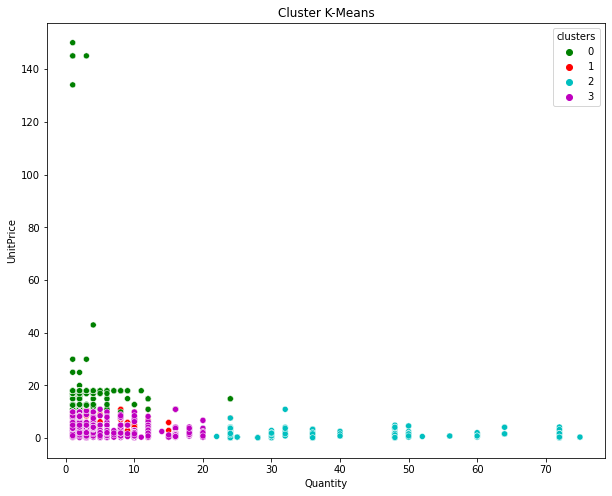

In [30]:
x_axis = dff_new['Quantity']
y_axis = dff_new['UnitPrice']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=dff_new['clusters'], palette=['g','r','c','m'])
plt.title('Cluster K-Means')
plt.show()

In [31]:
display(dff_new.groupby('clusters').agg(['mean','median']))

Quantity         UnitPrice        Invoice_Month       
               mean median       mean median          mean median
clusters                                                         
0          2.941884    2.0  17.575351  18.00      7.216433    8.0
1         10.097750   10.0   2.554760   1.95      3.364624    3.0
2         31.482456   24.0   1.111719   0.85      8.420175    9.0
3          8.191458    8.0   2.642440   1.95      9.945263   10.0

<AxesSubplot:xlabel='clusters', ylabel='count'>

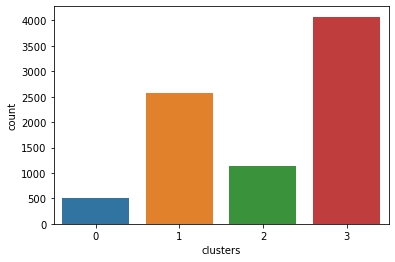

In [32]:
sns.countplot(dff_new.clusters)

# Modeling with PCA

In [33]:
pca = PCA()
pca.fit(data_std)

PCA()

In [34]:
pca.explained_variance_ratio_

array([0.43584759, 0.33401972, 0.2301327 ])

Text(0, 0.5, 'Cumulative Explained Variance')

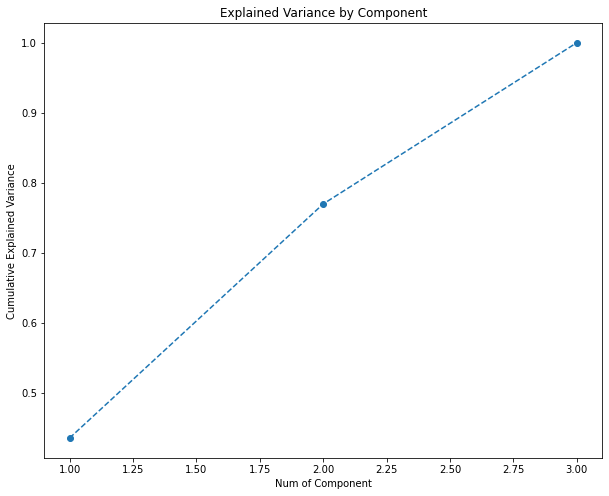

In [35]:
plt.figure(figsize = (10,8))
plt.plot(range(1,4),pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle='--')
plt.title('Explained Variance by Component')
plt.xlabel('Num of Component')
plt.ylabel('Cumulative Explained Variance')

In [36]:
pca = PCA(n_components= 2)
pca.fit(data_std)
pca.transform(data_std)

array([[-0.69911181, -1.22802589],
       [-0.69911181, -1.22802589],
       [ 0.11275366, -1.2615428 ],
       ...,
       [ 0.70793084, -1.27531563],
       [ 0.70793084, -1.27531563],
       [ 0.88345335, -1.26096517]])

In [37]:
scores_pca = pca.transform(data_std)

In [38]:
dff_segm_pca_kmeans = pd.concat ([dff_new.reset_index(drop=True),pd.DataFrame(scores_pca)], axis =1)
dff_segm_pca_kmeans.columns.values[-2:] = ['Component 1', 'Component 2']
dff_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [39]:
dff_segm_pca_kmeans

,Quantity,UnitPrice,Invoice_Month,clusters,Segmentation,Component 1,Component 2,Segment K-means PCA
0,24,3.75,12,2,third,-0.699112,-1.228026,2
1,24,3.75,12,2,third,-0.699112,-1.228026,2
2,12,3.75,12,3,fourth,0.112754,-1.261543,3
3,12,0.85,12,3,fourth,-0.278264,-1.323688,3
4,24,0.65,12,2,third,-1.117097,-1.294457,2
...,...,...,...,...,...,...,...,...
8286,12,0.85,12,3,fourth,-0.278264,-1.323688,3
8287,6,2.10,12,3,fourth,0.296211,-1.313660,3
8288,4,4.15,12,3,fourth,0.707931,-1.275316,3
8289,4,4.15,12,3,fourth,0.707931,-1.275316,3


In [40]:
dff_segm_pca_kmeans['Segment'] = dff_segm_pca_kmeans['Segment K-means PCA'].map({0:'first',
                                                                                 1:'second',
                                                                                 2: 'third',
                                                                                 3: 'fourth'})

In [41]:
dff_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()

,Quantity,UnitPrice,Invoice_Month,clusters,Component 1,Component 2
Segment K-means PCA,,,,,,
0,2.941884,17.575351,7.216433,0.0,2.509726,0.369214
1,10.097750,2.554760,3.364624,1.0,-0.064094,1.162243
2,31.482456,1.111719,8.420175,2.0,-1.620926,-0.246055
3,8.191458,2.642440,9.945263,3.0,0.186730,-0.711830


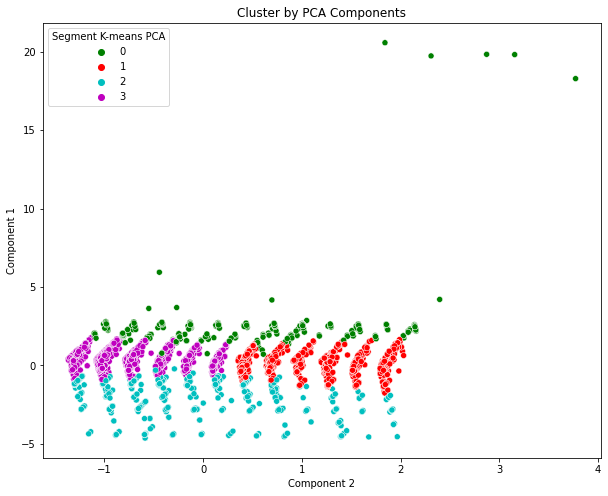

In [42]:
x_axis = dff_segm_pca_kmeans['Component 2']
y_axis = dff_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=dff_segm_pca_kmeans['Segment K-means PCA'], palette=['g','r','c','m'])
plt.title('Cluster by PCA Components')
plt.show()

# Conclusion

**1. With this model we can split customer segmentation into 4 clusters:**
- First Cluster (0): Customers who's buying in small quantity but with high price,and get invoice at middle of the year
- Second Cluster (1): Customers who's buying in moderate quantity but with low price, get invoice at early year
- Third Cluster (2): Customers who's buying in large quantity but with very low price, get invoice at middle of the year
- Fourth Cluster (3): This Cluster almost have similarity with second cluster, but the invoice was given at the end of the year

**2. The highest clusters are the Fourth Cluster and The Lowest are First Clusters**

**3. Principal Components Analysis (PCA) make it easier to see visualization of the Clusters** 

